# Twitter Sentiment Analysis 
#### Alvee Hoque 4/1/2021

Objective: Use the twitter API to get sentiment analysis on stock tickers.

#### Outline 

    1. Imports 
    2. Set Up Api 
    3. Collect Tweets 
    4. Clean Tweets 
    5. Tweet Analysis
    6. Bot functionality 

### 1. Imports 

In [5]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt 
%matplotlib inline

import tweepy as tw 
from textblob import TextBlob
from wordcloud import WordCloud

import re 
from datetime import timedelta
from datetime import date

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# config file with keys 
import config

In [6]:
plt.style.use('fivethirtyeight')

### 2. Set Up Api 

In [7]:
# create authentication object
auth = tw.OAuthHandler(config.consumer_key,config.consumer_secret)

# set access tokens 
auth.set_access_token(config.access_token,config.access_token_secret)

# create api object 
api = tw.API(auth, wait_on_rate_limit=True)

### 3. Collect Tweets

In [20]:
# Search Function 

def search_tweets(search_words,days_back):
    
    new_search = search_words + '-filter:retweets'
    today = date.today()
    date_since = today - timedelta(days_back)
    
    
    # if function is slow, adjust items accordingly. 100-1000 work fairly quick. 
    tweets = tw.Cursor(api.search,
                  q=new_search,
                  lang="en",
                  since=date_since).items(3000)
    
    df = pd.DataFrame( [tweet.text for tweet in tweets], columns=['Tweets'])

    return(df)

In [9]:
# Example search: $wish, 14 days
df = search_tweets('$wish',14)

In [10]:
df.head()

,Tweets
0,The list:\n$AMC still holding average $8.40\n$...
1,$GTii you want @cvpayne Charlie Poker to speak...
2,Bullish harami close on $WISH today
3,Updated $wish chart… Nice volume. My first Pt ...
4,"I’ve made $264k with their alerts, Make as muc..."


### 4. Clean Tweets

In [11]:
# Clean Text Function 
def cleanTxt(text):
    
    text = re.sub(r'@[A-Za-z0-9]+','',text)  #remove @mentions
    text = re.sub(r'#','',text)              #remove hashtags
    text = re.sub(r'RT[\s]+','',text)        #removing RT
    text = re.sub(r'https?:\/\/\S+','',text) #remove hyperlink
    
    return text 

In [12]:
df['Cleaned_Tweets'] = df['Tweets'].apply(cleanTxt)
df.head()

,Tweets,Cleaned_Tweets
0,The list:\n$AMC still holding average $8.40\n$...,The list:\n$AMC still holding average $8.40\n$...
1,$GTii you want @cvpayne Charlie Poker to speak...,$GTii you want Charlie Poker to speak up abou...
2,Bullish harami close on $WISH today,Bullish harami close on $WISH today
3,Updated $wish chart… Nice volume. My first Pt ...,Updated $wish chart… Nice volume. My first Pt ...
4,"I’ve made $264k with their alerts, Make as muc...","I’ve made $264k with their alerts, Make as muc..."


### Tweet Analysis

In [13]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity


# create new columns 
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)

df['Polarity'] = df['Tweets'].apply(getPolarity)

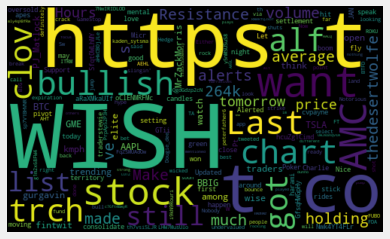

In [14]:
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500,height=300, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
# neg neutral pos analysis 

def getAnalysis(score):
    if score < 0 : 
        return 'Negative'
    elif score == 0 : 
        return 'Neutral'
    else: 
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)

In [16]:
# print positive tweets
j = 1
sorted_df = df.sort_values(by=['Polarity'])

for i in range(0,sorted_df.shape[0]):
    if (sorted_df['Analysis'][i] == 'Positive'):
        print(str(j)+ ')' +sorted_df['Tweets'][i])
        print()
        j+=1

1)$GTii you want @cvpayne Charlie Poker to speak up about stock settlement...won’t happen, he is just a “fly on the w… https://t.co/oClENMRFMc

2)Updated $wish chart… Nice volume. My first Pt is $16.94

Support 🟢: $13.47

Resistance 🔴: $14.41,  $15.00 (mental r… https://t.co/aRaXMkaUIf

3)I’ve made $264k with their alerts, Make as much as you want,,,,. https://t.co/GfsqHWGpHy

$wish $trch $alf $clov… https://t.co/Nwk4YT4FLr

4)@thedesertwolfe I love a good 69 but won't stick around to 69 $WISH

5)I’ve made $264k with their alerts, Make as much as you want,,,,. https://t.co/sp7V1BHVNR

$wish $trch $alf $clov… https://t.co/FqZSMUAdOw

6)@Dougie_dee What do you think about $wish ? Not meme hype/wise but volume/TA wise

7)The Notorious BIG said it best: "Either you're slingin' crack-rock, or you've got a wicked jump-shot." Nobody wants… https://t.co/g1m2x68FW4

8)Tomorrow’s watch list 👀 
$AEHL back on watch
$AHT ready for a bounce
$BBIG we are far from being done
$ITRM FDA app… https://t.c

In [17]:
# print negative tweets 
j = 1
sorted_df = df.sort_values(by=['Polarity'])

for i in range(0,sorted_df.shape[0]):
    if (sorted_df['Analysis'][i] == 'Negative'):
        print(str(j)+ ')' +sorted_df['Tweets'][i])
        print()
        j+=1

1)The list:
$AMC still holding average $8.40
$WISH Still holding average $7.80
$JAN Alerted last night and boom! Micr… https://t.co/hcuZg1Cimd

2)$WISH Let’s get them green candles tomorrow apes!

3)as a $WISH bull i want to point out that people looking for other undervalued stocks should definitely look into th… https://t.co/LHW7MusUlo

4)Hedge fund that bet against GameStop shuts down via @FT
#GME #AMC #WISH $GME $AMC $WISH  https://t.co/aHkCB0jJLe



Text(0, 0.5, 'Subjectivity')

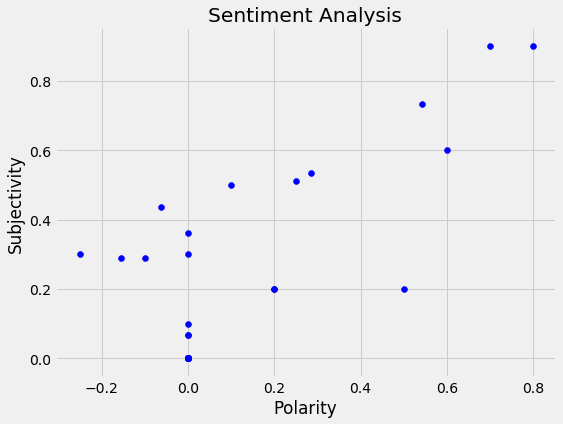

In [18]:
# Plotting polarity and subjectivity 

plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

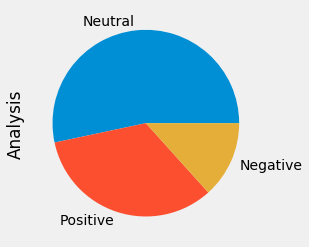

In [19]:
df['Analysis'].value_counts().plot(kind='pie')

#### Notes:
Neutral values will have to be inspected and will also need to look further into emojis in the tweets. Typically rocket, smile, and money emojis should make any tweet go positive. Will have to individually go through tweets to see if they are being accounted for